Fitted a=0.0658  b=0.00  RMSE=0.0018
Saved → data\curves.json
Figure → docs\figures\stiennon_log_fit.png


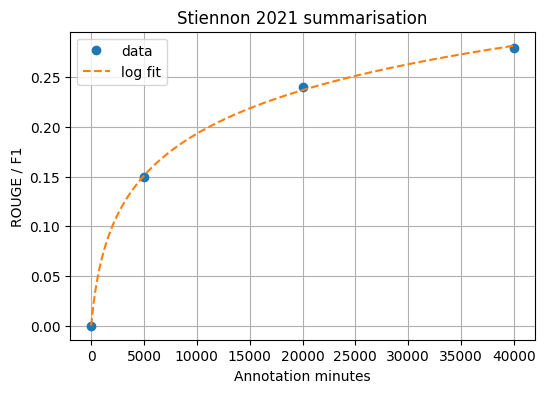

In [2]:
# 05_fit_stiennon.ipynb
import json, pathlib, sys
import pandas as pd, numpy as np
from src.utils  import parse_curve
from src.curves import fit_log_curve

ROOT = pathlib.Path.cwd().parent                # project root
CSV  = ROOT / "docs" / "literature_matrix.csv"

# --- load curve points -------------------------------------------------
df   = pd.read_csv(CSV)
row  = df[df["Paper"].str.contains("Stiennon")].iloc[0]
x, y = zip(*parse_curve(row["Key Curve Data"]))

# --- fit a · log(bx + 1) ----------------------------------------------
fit   = fit_log_curve(x, y)
a,b   = fit["a"], fit["b"]
rmse  = fit["rmse"]
print(f"Fitted a={a:.4f}  b={b:.2f}  RMSE={rmse:.4f}")

# --- write into data/curves.json --------------------------------------
curves_p = ROOT / "data" / "curves.json"
curves   = json.loads(curves_p.read_text())
curves["Stiennon2021-label"] = {"a": a, "b": b, "rmse": rmse}
curves_p.write_text(json.dumps(curves, indent=2))
print("Saved →", curves_p.relative_to(ROOT))

# --- quick plot --------------------------------------------------------
import matplotlib.pyplot as plt
xx = np.linspace(0, max(x), 200)
plt.figure(figsize=(6,4))
plt.plot(x,  y,  "o", label="data")
plt.plot(xx, a*np.log(b*xx + 1), "--", label="log fit")
plt.title("Stiennon 2021 summarisation")
plt.xlabel("Annotation minutes")
plt.ylabel("ROUGE / F1")
plt.legend(); plt.grid(True)

FIG = ROOT / "docs" / "figures" / "stiennon_log_fit.png"
plt.savefig(FIG, dpi=150)
print("Figure →", FIG.relative_to(ROOT))
plt.show()
